## <span style=color:green><center>*REGRESIÓN LINEAL*</center></span>
### <span style=color:red><center>David Alexis Arias Beltrán</center></span>
#### <span style=color:blue><center>Diplomado de Inteligencia Artificial y Aprendizaje Profundo</center></span>

### Contenido

1. Introducción
2. Historia de la regresión lineal
3. Algoritmo y problema
4. Conclusiones

### 1. Introducción

En este ensayo se encontrará una revisión histórica sobre el concepto de regresión lineal y de su utilidad implementada en el campo de la estadística y a su vez en el machine learning. Cabe resaltar que se hará la implementación de un algoritmo el cual utilizará datos reales y que reflejará el concepto de regresión lineal frente a la formación de un modelo.

### 2. Historia de la regresión lineal

La regresión lineal es un método estadístico que estudia la relación que existe entre 2 variables que en pocas palabras, se traduce como un modelo lineal.

![Imagen regresion](https://www.iartificial.net/wp-content/uploads/2018/12/ejemplo-error-cuadratico-medio2.png)

Fuente: [IArtifical.net](https://www.iartificial.net/regresion-lineal-con-ejemplos-en-python/)

El primer método documentado fue el de mínimos cuadrados el cual fue publicado por el matemático Adrien-Marie Legendre en el año de 1805, pero posteriormente, el reconocido matemático Gauss profundizó este concepto y desarrollado de manera más específica. [Wikipedia](https://es.wikipedia.org/wiki/Regresi%C3%B3n_lineal)

![Matemático Legendre](Legendre.jpg)

### 3. Algoritmo y problema

En primer lugar, se escogió un dataset propio de sklearn. En este caso, durante el desarrollo del algoritmo, se seleccionó el dataset correspondiente a *Wine recognition*

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as skl
from sklearn.datasets import load_wine
import scipy as sc

In [24]:
wine_dataset = load_wine()
print(wine_dataset.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

Seguido a esto, se pretende conocer la relación que existe entre las variables *hue* (matiz del vino) que se traduce a que tan vieja es la bebida y la variable *color intensity*

In [25]:
X = wine_dataset.data
n, p = X.shape
s6 = X[:, 9]#color 
s7 = X[:, 10]#matiz

In [41]:
def relation_rm_medv(s6, means):
    plt.scatter(s6,means,alpha=0.5)
    plt.title("Relación de matiz y color")
    plt.xlabel('Intensidad de color')
    plt.ylabel('Matiz')
    plt.show()
    return np.corrcoef(s6,means)[0, 1]

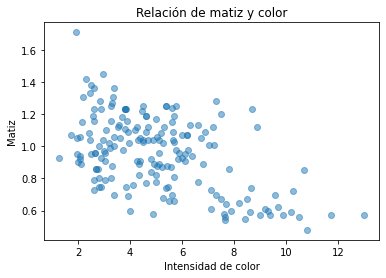

La correlación de Matiz e Intensidad de color es: -0.5218131932287577


In [42]:
print("La correlación de Matiz e Intensidad de color es:", relation_rm_medv(s6, s7))

Como se puede observar, la distribución de los datos tiende a conformar una posibilidad de describir el comportamiento de los datos mediante un modelo lineal, lo cual se confirma con el resultado de la correlación entre las variables en estudio (matiz e intensidad de color).

Seguido a esto, se realizó el algoritmo para encontrar el modelo lineal que describa de mejor manera el comportamiento de estos.

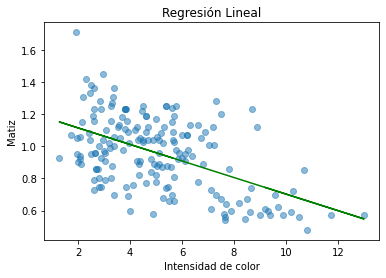

w =  [ 1.21767911 -0.05144821]
Matiz para una intensidad de color de 1.3:  1.15
La intensidad de color para un matiz de 0.05 es:  22.7
ECM:  0.04


In [49]:
def lineal_regression(x, means):
#   W = (Xt*X)^-1 * Xt*Y 
    w = np.linalg.inv(x.T @ x) @ x.T @ s7
    plt.scatter(s6, means, alpha=0.5)
    plt.plot(s6, x @ w, color="green")
    plt.title("Regresión Lineal")
    plt.xlabel('Intensidad de color')
    plt.ylabel('Matiz')
    plt.show()
    return w, x @ w
  
def predecir_matiz(matiz, w):
    return (w[0] + w[1] * matiz)
  
def predict_from_price(price, w):
    return (price - w[0]) / w[1]
  
def get_mse(yp, y):
    return np.mean(np.square(np.subtract(yp, y)))
    

w, yp = lineal_regression(np.c_[np.ones(s6.shape[0]), s6], s7)
print('w = ', w)
print('Matiz para una intensidad de color de 1.3: ',np.round(predecir_matiz(1.3, w),2))
print('La intensidad de color para un matiz de 0.05 es: ', np.round(predict_from_price(0.05, w),2))
print('ECM: ',np.round(get_mse(yp, s7),2))

Teniendo los resultados anteriores, la ecuación correspondiente al modelo obtenido es:

$$y=-0.0514w_{0}+1.2176w_{1}$$

Siendo el coeficiente que acompaña a $w_{0}$ la pendiente de la recta y el coeficiente del término de $w_{1}$ el punto de corte con el eje Y de la gráfica.

#### Conclusiones

1. Se determinó el modelo de regresión lineal que comprendia la relación entre la variable de matiz e intensidad de color del vino.
2. La correlación lineal entre los datos apunta una relación lineal de fuerza media, es decir, los datos no tienden a tener cierta concentración, por consiguiente, la correlación empieza a disminuir (presencia de datos atípicos).
3. Las predicciones realizadas dan constancia a que el modelo realizado permite realizar este tipo de acciones a pesar de no tener los correspondientes datos.
